In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data.shape

(150, 4)

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
for data, target in zip(iris.data[:5], iris.target[:5]):
    print(data, target)

[5.1 3.5 1.4 0.2] 0
[4.9 3.  1.4 0.2] 0
[4.7 3.2 1.3 0.2] 0
[4.6 3.1 1.5 0.2] 0
[5.  3.6 1.4 0.2] 0


In [6]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


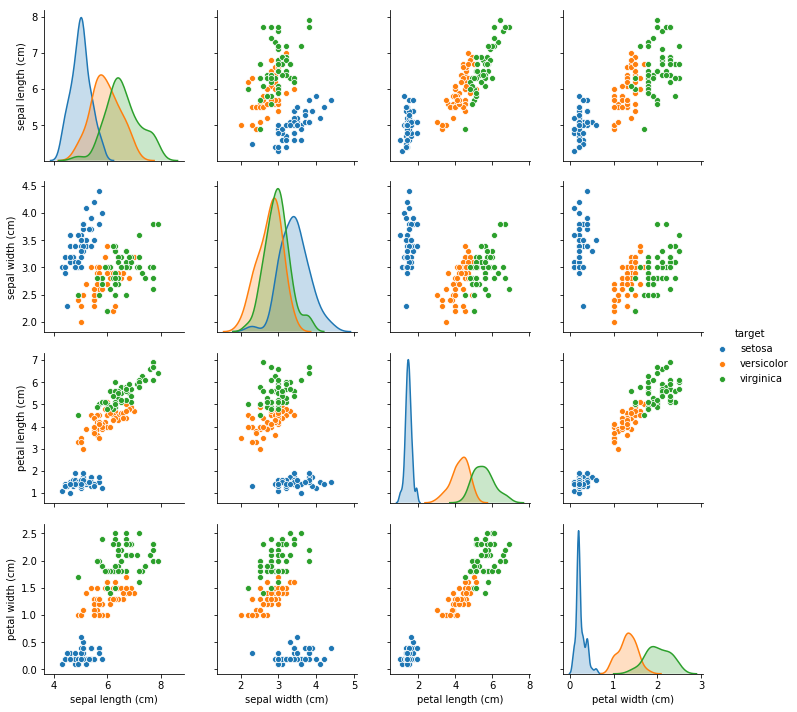

In [8]:
import seaborn as sns
# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline

sns.pairplot(df, hue="target")

In [9]:
# import some data to play with
X = iris.data[:, [0, 2]] 
y = iris.target

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# graph common settings
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def decision_boundary(clf, X, y, ax, title):
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # label
    ax.set_title(title)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('petal length')

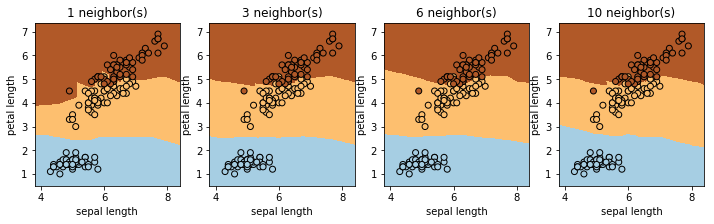

In [11]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_neighbors in zip(axes, [1, 3, 6, 10]):
    title = "%s neighbor(s)"% (n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(clf, X, y, ax, title)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

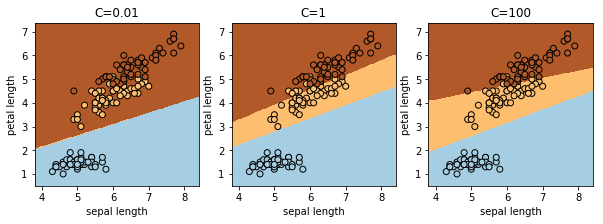

In [12]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LogisticRegression(C=C)
    decision_boundary(clf, X, y, ax, title)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


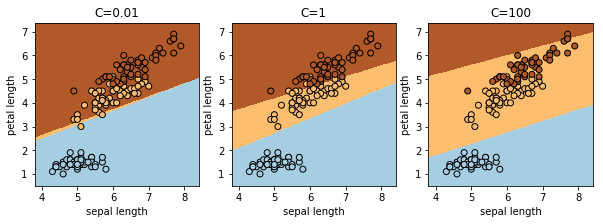

In [13]:
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LinearSVC(C=C)
    decision_boundary(clf, X, y, ax, title)

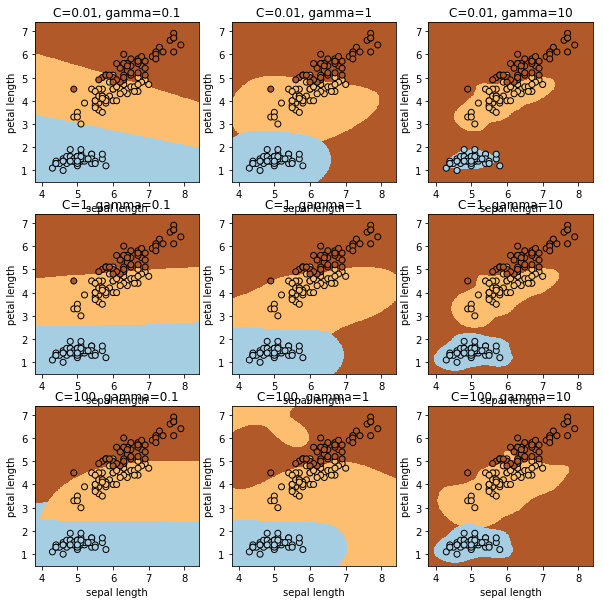

In [14]:
from sklearn.svm import SVC

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax_row, C in zip(axes, [0.01, 1, 100]):
    for ax, gamma in zip(ax_row, [0.1, 1, 10]):
        title = "C=%s, gamma=%s"% (C, gamma)
        clf = SVC(C=C, gamma=gamma)
        decision_boundary(clf, X, y, ax, title)

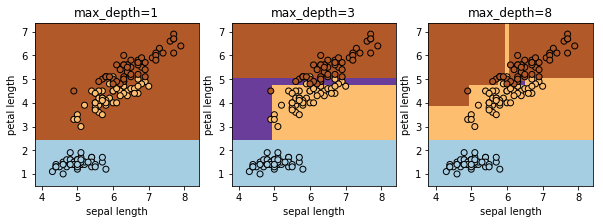

In [15]:
from sklearn.tree import DecisionTreeRegressor

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, max_depth in zip(axes, [1, 3, 8]):
    title = "max_depth=%s"% (max_depth)
    clf = DecisionTreeRegressor(max_depth=max_depth)
    decision_boundary(clf, X, y, ax, title)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


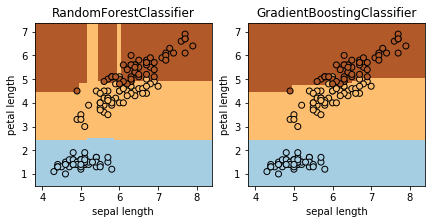

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
clfs = [RandomForestClassifier(), GradientBoostingClassifier()]
titles = ["RandomForestClassifier", "GradientBoostingClassifier"]

for ax, clf, title in zip(axes, clfs, titles):
    decision_boundary(clf, X, y, ax, title)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


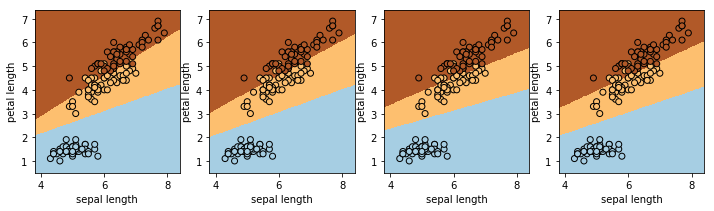

In [17]:
from sklearn.neural_network import MLPClassifier

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n in zip(axes, [15, 15, 15, 15]):
    title = ""
    clf = MLPClassifier(hidden_layer_sizes=[n, n])
    decision_boundary(clf, X, y, ax, title)

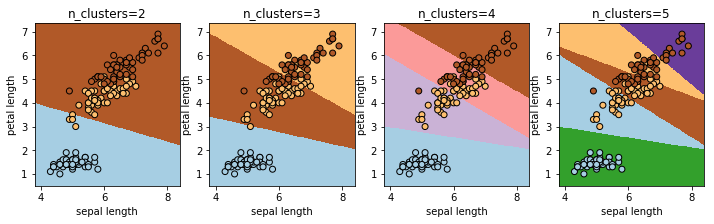

In [18]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_clusters in zip(axes, [2, 3, 4, 5]):
    title = "n_clusters=%s"% (n_clusters)
    clf = KMeans(n_clusters=n_clusters)
    decision_boundary(clf, X, y, ax, title)